<a href="https://colab.research.google.com/github/Abdul-Karim1/Customer-Churn-Pediction/blob/main/Task3_Customer_Churn_Pediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential # used for init our ANN model
from tensorflow.keras.layers import Dense # used for different layer structure
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('/content/drive/MyDrive/ML_Dataset_internship/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


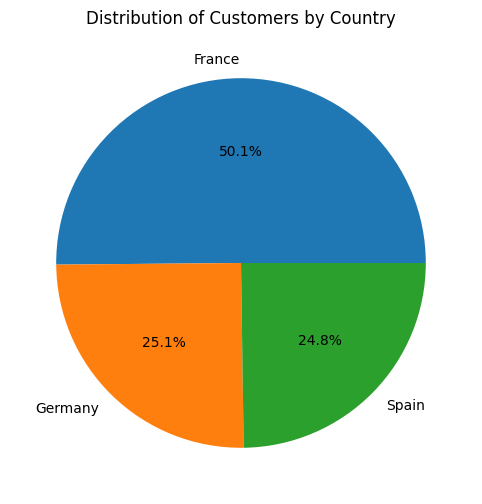

In [7]:
plt.figure(figsize=(10, 6))
df['Geography'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Remove the y-label
plt.title("Distribution of Customers by Country")
plt.show()


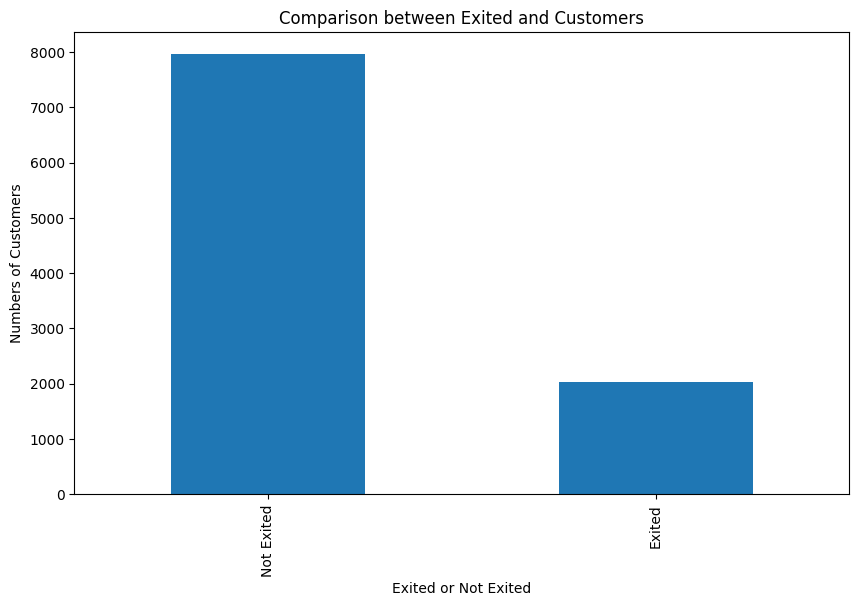

In [8]:
plt.figure(figsize=(10, 6))
df['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited or Not Exited')
plt.ylabel('Numbers of Customers')
plt.title("Comparison between Exited and Customers")
plt.xticks(ticks=[0, 1], labels=['Not Exited', 'Exited'])
plt.show()

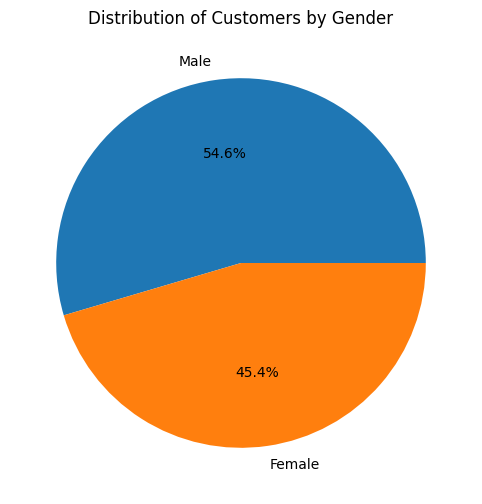

In [9]:
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Remove the y-label
plt.title("Distribution of Customers by Gender")
plt.show()

In [10]:
df= pd.get_dummies(df, columns= ['Geography', 'Gender'], drop_first=True)

In [11]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace= True )

In [12]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=3)

In [14]:
sc=StandardScaler()
# Fit StandardScaler on training data and transform both training and testing data
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [15]:
classifier=Sequential()

In [16]:
classifier.add(Dense(6,activation='relu',input_dim=11))
classifier.add(Dense(6,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = classifier.fit(X_train_scaled, y_train, batch_size=10, epochs=10, verbose=1, validation_split=0.25)

Epoch 1/10
563/563 [==============================] - 6s 5ms/step - loss: 0.5986 - accuracy: 0.7072 - val_loss: 0.4891 - val_accuracy: 0.8027
Epoch 2/10
563/563 [==============================] - 2s 4ms/step - loss: 0.4701 - accuracy: 0.7963 - val_loss: 0.4335 - val_accuracy: 0.8048
Epoch 3/10
563/563 [==============================] - 2s 4ms/step - loss: 0.4332 - accuracy: 0.8043 - val_loss: 0.4168 - val_accuracy: 0.8117
Epoch 4/10
563/563 [==============================] - 3s 5ms/step - loss: 0.4217 - accuracy: 0.8158 - val_loss: 0.4099 - val_accuracy: 0.8192
Epoch 5/10
563/563 [==============================] - 2s 4ms/step - loss: 0.4144 - accuracy: 0.8180 - val_loss: 0.4037 - val_accuracy: 0.8181
Epoch 6/10
563/563 [==============================] - 3s 6ms/step - loss: 0.4065 - accuracy: 0.8288 - val_loss: 0.3940 - val_accuracy: 0.8288
Epoch 7/10
563/563 [==============================] - 2s 4ms/step - loss: 0.3955 - accuracy: 0.8356 - val_loss: 0.3846 - val_accuracy: 0.8315
Epoch 

In [20]:
# predicting the test set result
y_pred = classifier.predict(X_test_scaled)
y_pred = (y_pred>0.5)
y_pred


79/79 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

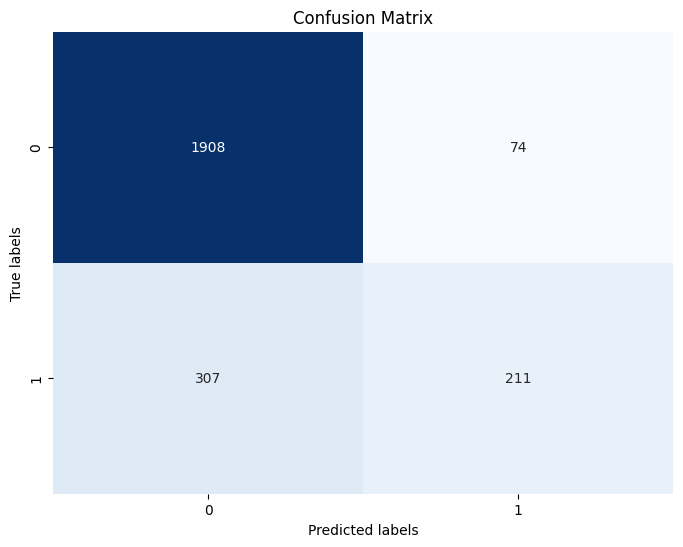

In [22]:
# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8476

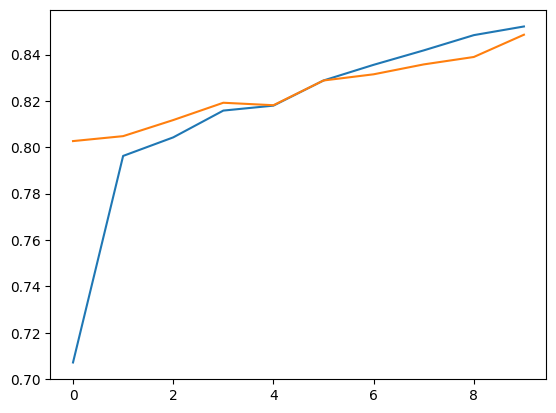

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

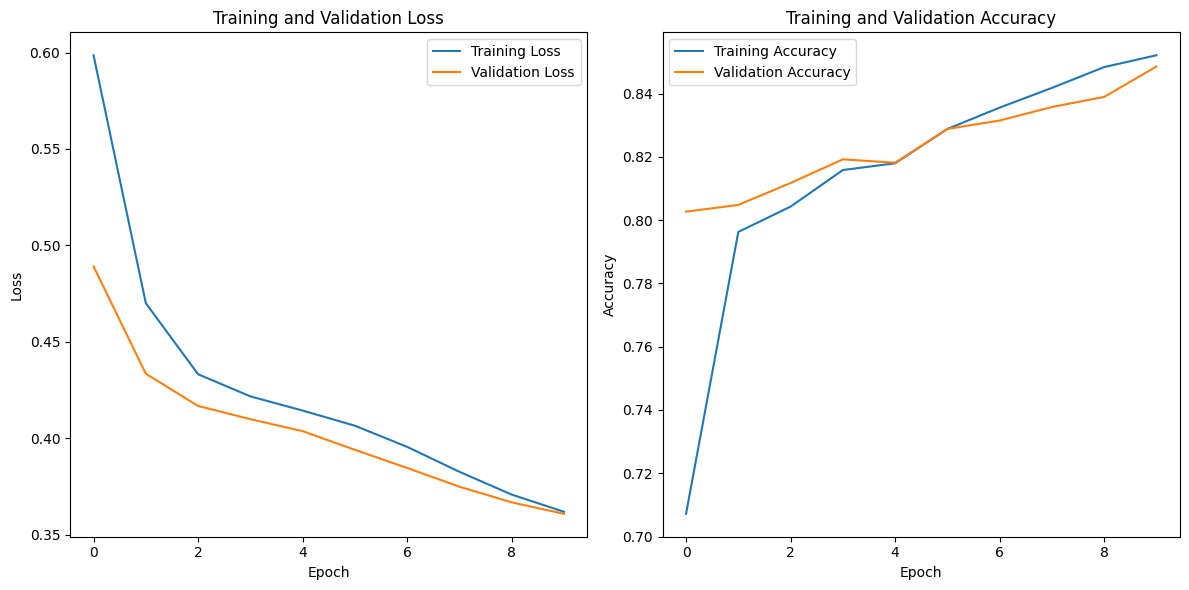

In [25]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
